In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset (assuming 'netflix_titles.csv' is in the working directory)
df = pd.read_csv(r'C:\Users\shaya\Desktop\python\Python\coding of Python\python_for_data_science\Pandas_tips_tricks\Data\netflix_titles.csv')

# Display initial information and first few rows
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (8807, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

First 5 Rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV

In [28]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Handling Missing Values
# 1. Fill critical missing values with 'Unknown' or 'Missing'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Missing', inplace=True)

# 2. Convert 'date_added' to datetime and extract Year/Month added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month_added'] = df['date_added'].dt.month_name().fillna('Missing')

# 3. Create a 'First Genre' feature for simpler analysis
df['first_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing Values After Cleaning:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added       0
month_added      0
first_genre      0
dtype: int64


C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\2435209662.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\2435209662.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\3436710889.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




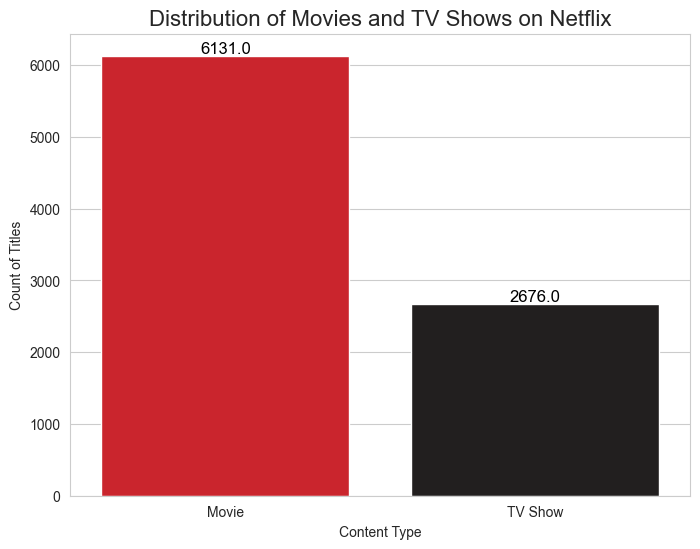

In [29]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', data=df, palette=['#E50914', '#221F1F'])
plt.title('Distribution of Movies and TV Shows on Netflix', fontsize=16)
plt.xlabel('Content Type')
plt.ylabel('Count of Titles')

# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

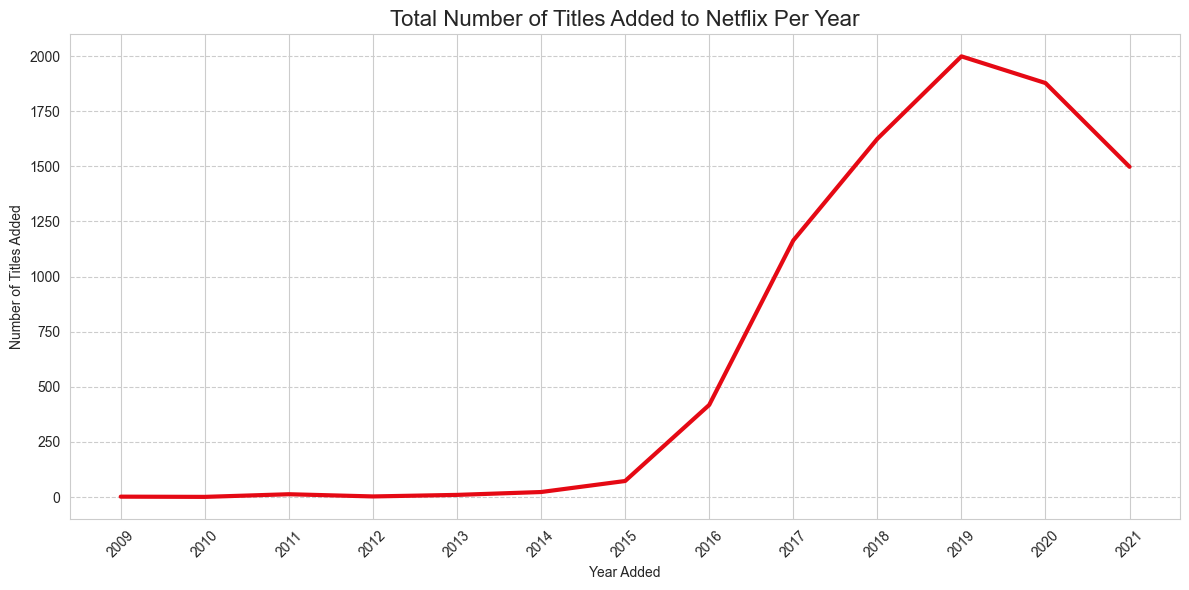

In [30]:
# Filter data starting from the first recorded addition (e.g., year 2008)
content_added_yearly = df[df['year_added'] > 2008].groupby('year_added')['show_id'].count().reset_index()

# Line plot for content added per year
sns.lineplot(x='year_added', y='show_id', data=content_added_yearly, color='#E50914', linewidth=3)
plt.title('Total Number of Titles Added to Netflix Per Year', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(content_added_yearly['year_added'], rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\2842718180.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




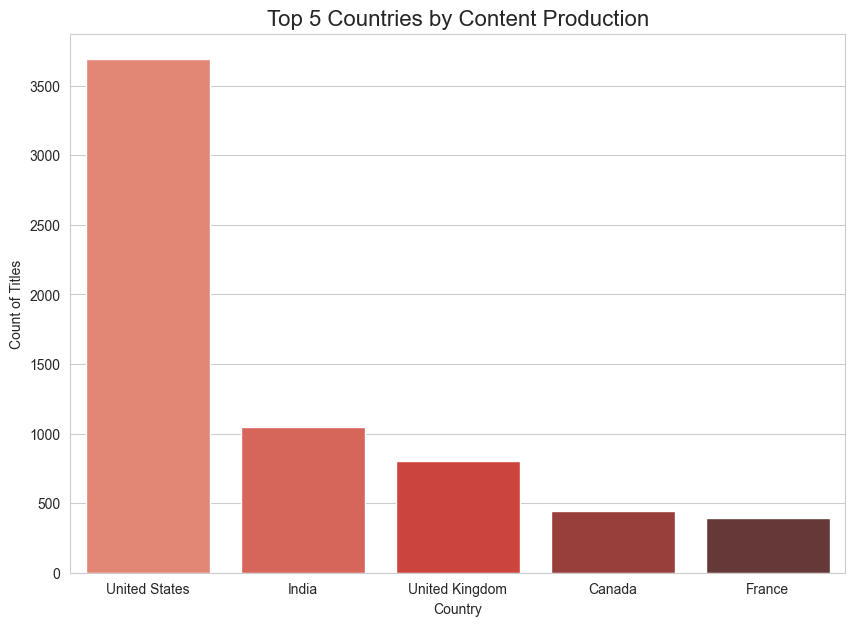

In [31]:
# Count the occurrences of each country (handling multi-country listings)
country_counts = df['country'].str.split(', ', expand=True).stack().value_counts()
top_countries = country_counts.drop('Unknown').head(5)

# Bar plot for top countries
plt.figure(figsize=(10, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds_d')
plt.title('Top 5 Countries by Content Production', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.show()

C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\1217759312.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




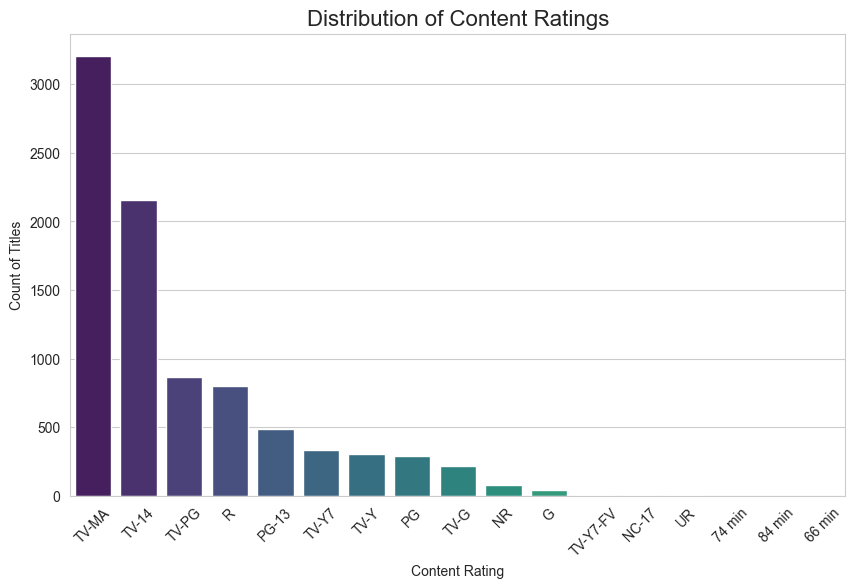

In [32]:
# Count plot for 'rating'
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Content Rating')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45)
plt.show()

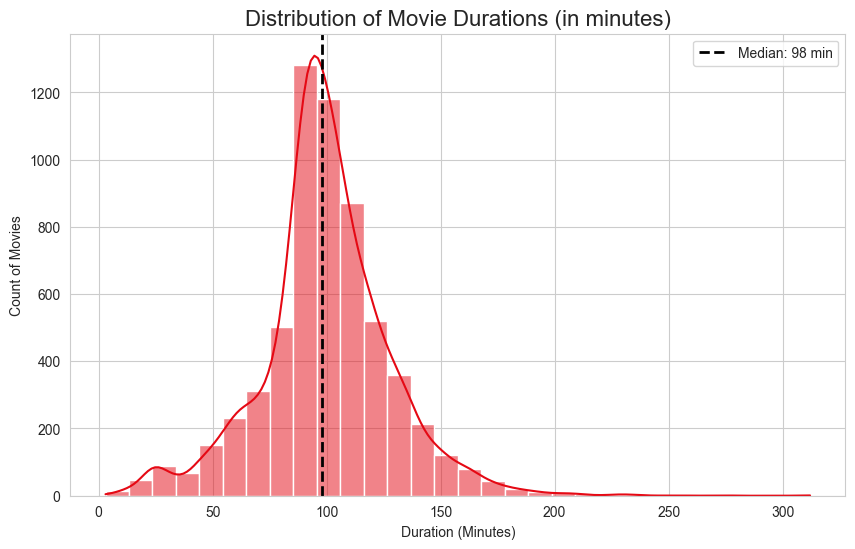


Movie Duration Statistics:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


In [33]:
# 1. Filter the DataFrame for Movies only
df_movies = df[df['type'] == 'Movie'].copy()

# 2. Convert 'duration' from string (e.g., '93 min') to integer minutes
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(float)

# 3. Plot the distribution of movie duration
plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration_min'], bins=30, kde=True, color='#E50914')
plt.title('Distribution of Movie Durations (in minutes)', fontsize=16)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count of Movies')
plt.axvline(df_movies['duration_min'].median(), color='black', linestyle='--', linewidth=2, label=f'Median: {df_movies["duration_min"].median():.0f} min')
plt.legend()
plt.show()

# Display key statistics
print("\nMovie Duration Statistics:")
print(df_movies['duration_min'].describe())

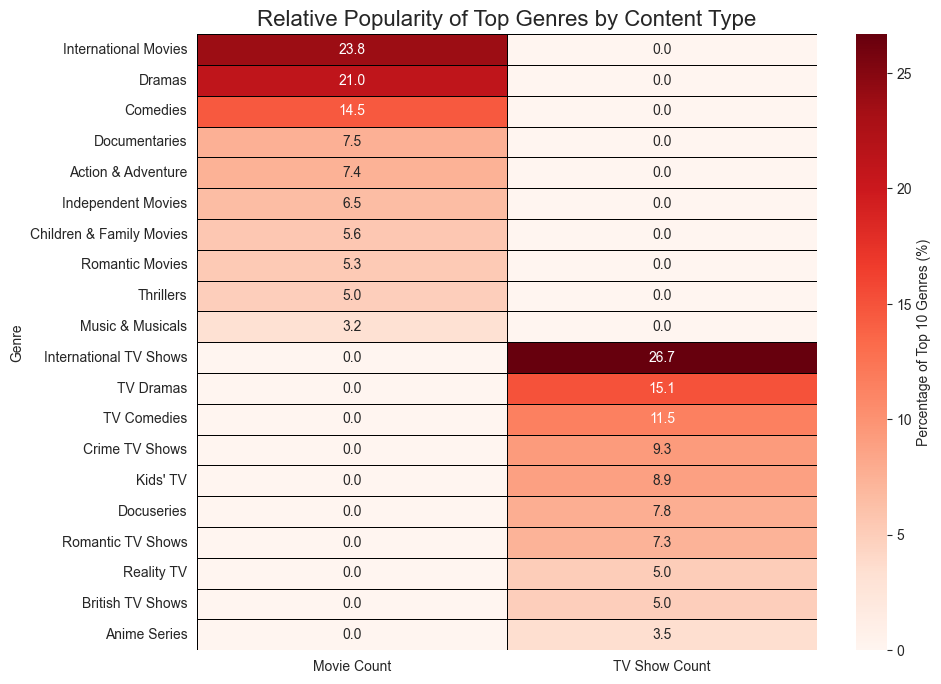

In [34]:
# Helper function to split and count genres
def get_genre_counts(df_type):
    # Split the 'listed_in' column by comma and count occurrences
    genres = df_type['listed_in'].str.split(', ', expand=True).stack()
    return genres.value_counts().head(10)

# Get top 10 genres for each type
top_movie_genres = get_genre_counts(df[df['type'] == 'Movie'])
top_tv_show_genres = get_genre_counts(df[df['type'] == 'TV Show'])

# Combine into a comparative DataFrame
genre_comparison = pd.concat([top_movie_genres, top_tv_show_genres], axis=1)
genre_comparison.columns = ['Movie Count', 'TV Show Count']
genre_comparison = genre_comparison.fillna(0).astype(int)

# Normalize for Heatmap (to compare relative importance)
genre_heatmap_data = genre_comparison.apply(lambda x: x / x.sum(), axis=0) * 100

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(genre_heatmap_data, annot=True, fmt=".1f", cmap='Reds', linewidths=.5, linecolor='black', cbar_kws={'label': 'Percentage of Top 10 Genres (%)'})
plt.title('Relative Popularity of Top Genres by Content Type', fontsize=16)
plt.ylabel('Genre')
plt.show()

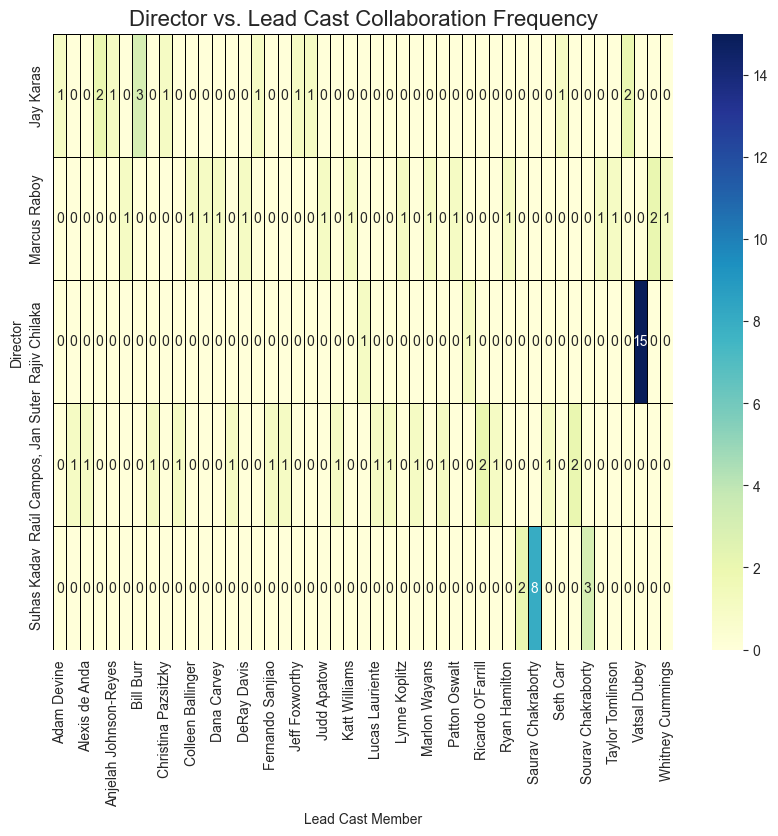

In [35]:
# 1. Create a list of the top 5 most frequent Directors (excluding 'Unknown')
top_directors = df['director'].value_counts().drop('Unknown').head(5).index.tolist()

# 2. Filter content only for these directors
df_top_directors = df[df['director'].isin(top_directors)]

# 3. Explode the 'cast' column to have one row per director-actor pair
# Note: Limiting to the first 5 cast members for performance/clarity
df_collab = df_top_directors.copy()
df_collab['first_cast'] = df_collab['cast'].apply(lambda x: x.split(', ')[0] if x != 'Unknown' else None)
df_collab = df_collab.dropna(subset=['first_cast'])

# 4. Count the number of collaborations (Director vs. Lead Cast)
collab_matrix = df_collab.groupby(['director', 'first_cast']).size().reset_index(name='Collaboration_Count')
collab_pivot = collab_matrix.pivot_table(index='director', columns='first_cast', values='Collaboration_Count').fillna(0)

# Plotting the collaboration matrix (simplified for visualization)
plt.figure(figsize=(10, 8))
sns.heatmap(collab_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, linecolor='black')
plt.title('Director vs. Lead Cast Collaboration Frequency', fontsize=16)
plt.ylabel('Director')
plt.xlabel('Lead Cast Member')
plt.show()

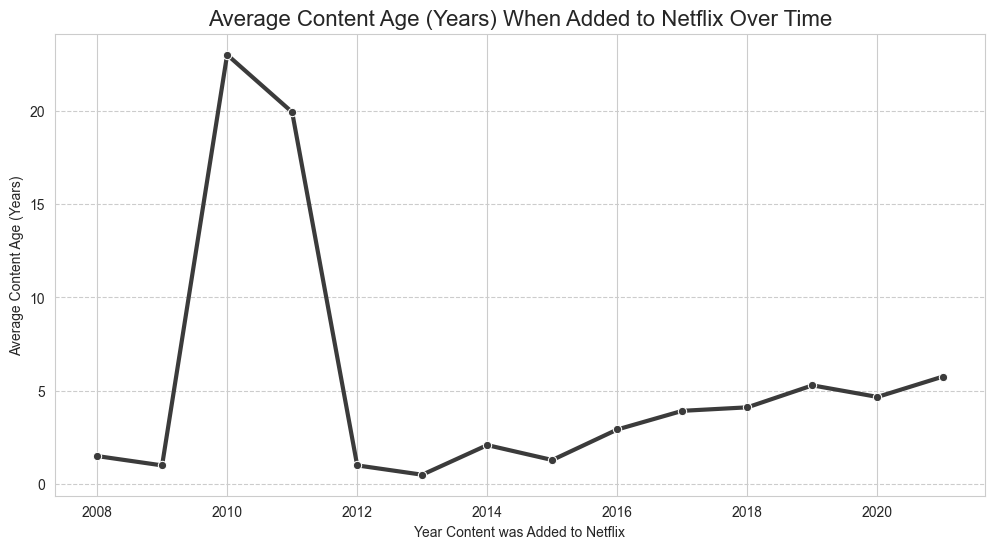

In [36]:
# 1. Ensure 'release_year' is an integer
df['release_year'] = df['release_year'].astype(int)

# 2. Calculate the age of the content when it was added to Netflix
# We exclude records where year_added is 0 (missing)
df_valid_dates = df[df['year_added'] != 0].copy()
df_valid_dates['content_age_at_acquisition'] = df_valid_dates['year_added'] - df_valid_dates['release_year']

# 3. Analyze the average age of content added over time
age_trend = df_valid_dates.groupby('year_added')['content_age_at_acquisition'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_added', y='content_age_at_acquisition', data=age_trend, marker='o', color='#3B3B3B', linewidth=3)
plt.title('Average Content Age (Years) When Added to Netflix Over Time', fontsize=16)
plt.xlabel('Year Content was Added to Netflix')
plt.ylabel('Average Content Age (Years)')
plt.grid(axis='y', linestyle='--')
plt.show()

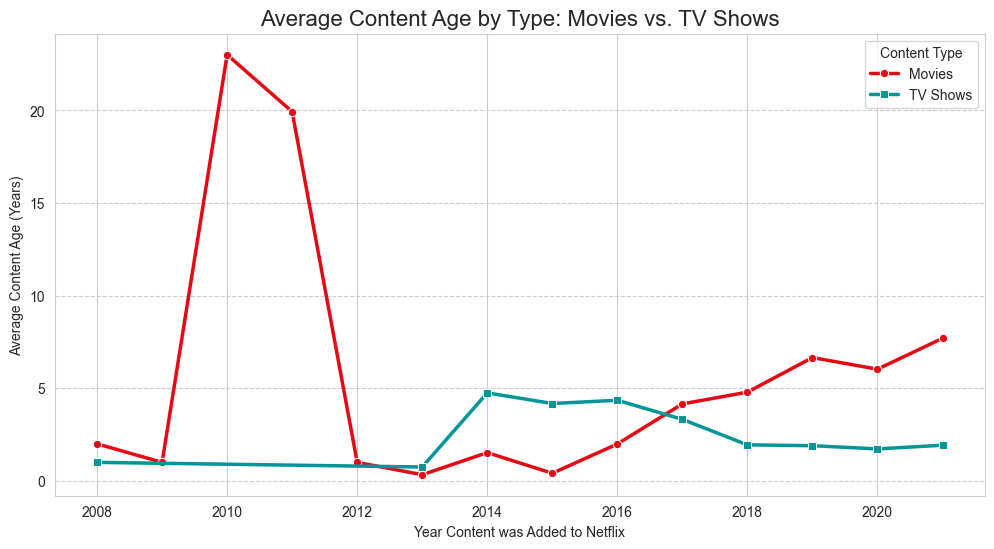

In [37]:
# Create a pivot table to compare the mean age by year and type
age_pivot = df_valid_dates.groupby(['year_added', 'type'])['content_age_at_acquisition'].mean().unstack().reset_index()

# Plot comparison
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_added', y='Movie', data=age_pivot, marker='o', label='Movies', color='#E50914', linewidth=2.5)
sns.lineplot(x='year_added', y='TV Show', data=age_pivot, marker='s', label='TV Shows', color='#009599', linewidth=2.5)

plt.title('Average Content Age by Type: Movies vs. TV Shows', fontsize=16)
plt.xlabel('Year Content was Added to Netflix')
plt.ylabel('Average Content Age (Years)')
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--')
plt.show()

C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\2997760267.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




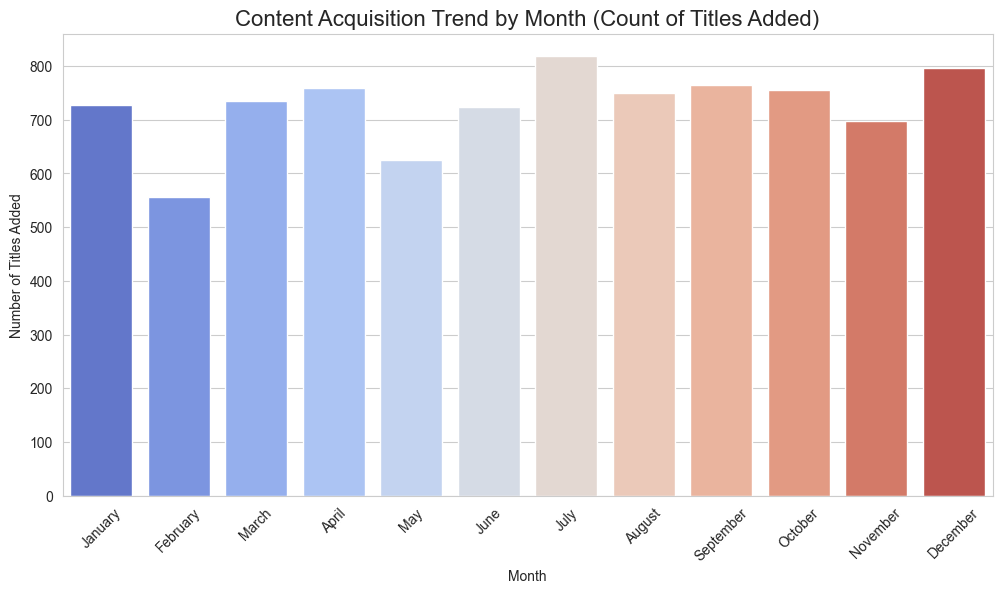

In [38]:
# 1. Extract the release month from the 'date_added' column
df['release_month'] = df['date_added'].dt.month

# 2. Count the frequency of titles added by month (excluding missing dates)
monthly_added_counts = df.dropna(subset=['release_month']).groupby(df['date_added'].dt.month_name())['show_id'].count()
monthly_added_counts = monthly_added_counts.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                                     'July', 'August', 'September', 'October', 'November', 'December'])

# 3. Plot the monthly acquisition trend
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_added_counts.index, y=monthly_added_counts.values, palette='coolwarm')
plt.title('Content Acquisition Trend by Month (Count of Titles Added)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

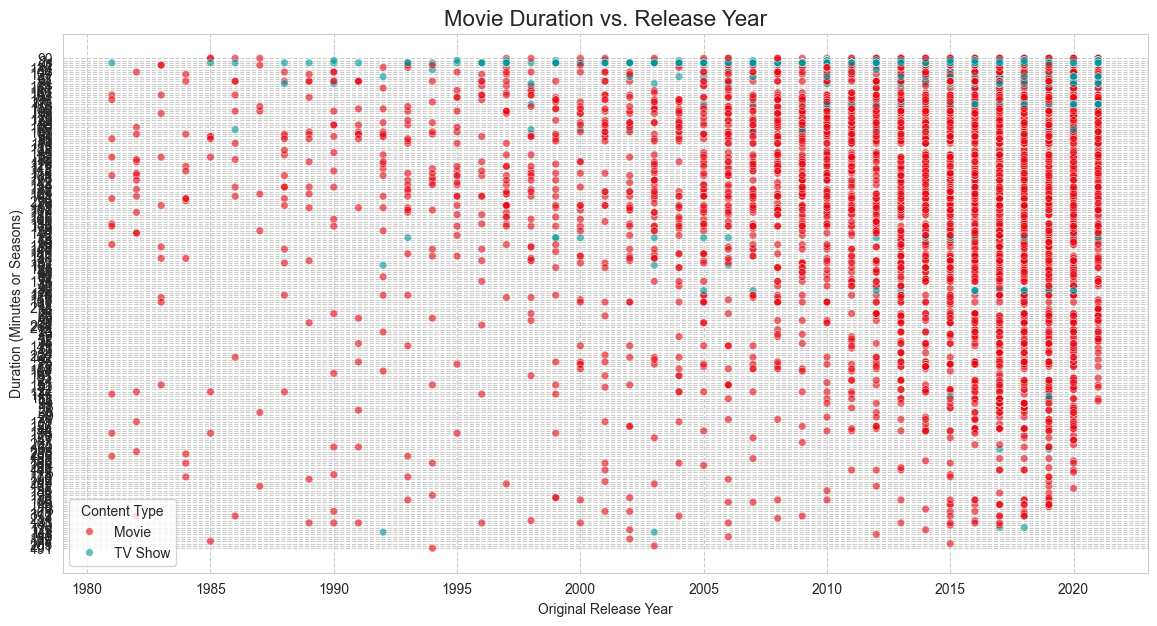

In [39]:
# Assuming 'df_movies' with 'duration_min' and 'df_tvshows' (after cleaning and splitting) exist
# For this plot, we only use the original release year, not the year added.

# Create a combined DataFrame for plotting relevant columns
df_scatter = df.copy()
df_scatter['duration_val'] = df_scatter['duration'].str.replace(' min| Season| Seasons', '', regex=True).astype(float, errors='ignore')

# Filter for the main data types and years after 1980 for better visual focus
df_scatter = df_scatter[(df_scatter['type'].isin(['Movie', 'TV Show'])) & 
                       (df_scatter['release_year'] > 1980)].dropna(subset=['duration_val'])

plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='release_year', 
    y='duration_val', 
    hue='type', 
    data=df_scatter, 
    palette={'Movie': '#E50914', 'TV Show': '#009599'},
    alpha=0.6,
    s=30
)

plt.title('Movie Duration vs. Release Year', fontsize=16)
plt.xlabel('Original Release Year')
plt.ylabel('Duration (Minutes or Seasons)')
plt.legend(title='Content Type')
plt.grid(True, linestyle='--')
plt.show()

C:\Users\shaya\AppData\Local\Temp\ipykernel_9148\944348769.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




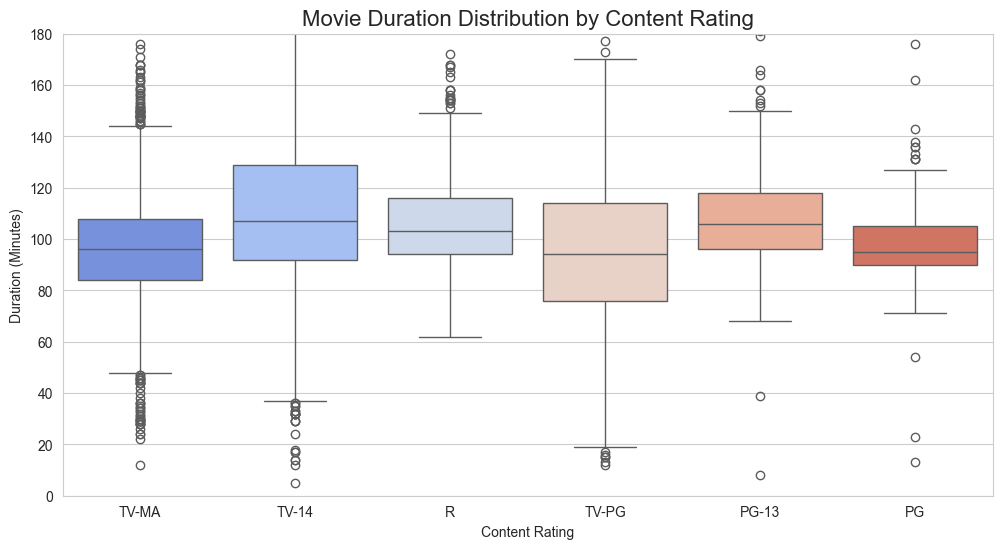

In [40]:
# Re-using df_movies with 'duration_min' from step 4.1
# Focus on the 6 most common ratings for clarity

top_ratings = df_movies['rating'].value_counts().head(6).index.tolist()
df_box = df_movies[df_movies['rating'].isin(top_ratings)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_min', data=df_box, 
            order=top_ratings, palette='coolwarm')

plt.title('Movie Duration Distribution by Content Rating', fontsize=16)
plt.xlabel('Content Rating')
plt.ylabel('Duration (Minutes)')
plt.ylim(0, 180) # Limit Y-axis for better visual focus on core data
plt.show()

In [41]:
# For simplicity, we use the 'first_country' and the 4 most frequent countries/types/ratings
# Data Preparation (Simulated Multi-Level Aggregation)
df_sunburst = df_valid_dates.copy()

# 1. Simplify country and rating
df_sunburst['country_simple'] = df_sunburst['country'].apply(lambda x: x.split(',')[0].strip())
top_countries = df_sunburst['country_simple'].value_counts().head(3).index.tolist()
df_sunburst = df_sunburst[df_sunburst['country_simple'].isin(top_countries)]

# 2. Group and count the hierarchy
hierarchy_data = df_sunburst.groupby(['country_simple', 'type', 'rating']).size().reset_index(name='Count')

fig = px.sunburst(
    hierarchy_data, 
    path=['country_simple', 'type', 'rating'], 
    values='Count',
    title='Hierarchical Content Distribution: Country -> Type -> Rating'
)
fig.show()

print("--- Data for Sunburst Chart ---")
print(hierarchy_data.head(10))

--- Data for Sunburst Chart ---
  country_simple   type    rating  Count
0          India  Movie        NR      4
1          India  Movie        PG      4
2          India  Movie     PG-13      5
3          India  Movie         R      2
4          India  Movie     TV-14    539
5          India  Movie      TV-G      6
6          India  Movie     TV-MA    226
7          India  Movie     TV-PG    129
8          India  Movie     TV-Y7     11
9          India  Movie  TV-Y7-FV      1
